In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt  #Пакет для построения графиков и прочего
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Статистическая проверка гипотез для связанных выборок. A/B тесты и как их проводить»</b></h3>


In [2]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t") # Подгрузим данные
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


In [3]:
# изменим формат  данных, подходящего для пакета statsmodels
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
 
df_melt.columns = ['index', 'treatments', 'value'] # заменяем имена столбцов
print(df_melt)

    index treatments  value
0       0          A     25
1       1          A     30
2       2          A     28
3       3          A     36
4       4          A     29
5       0          B     45
6       1          B     55
7       2          B     29
8       3          B     56
9       4          B     40
10      0          C     30
11      1          C     29
12      2          C     33
13      3          C     37
14      4          C     27
15      0          D     54
16      1          D     60
17      2          D     51
18      3          D     62
19      4          D     73


In [4]:
#Проверка теста из коробки на вычисления
print(df[['A','C']])
print()

#Вычислим по формуле
t  = (df['A'].mean() - df['C'].mean())/(df['A'].std()**2/df['A'].count()+df['C'].std()**2/df['C'].count())**0.5
t

    A   C
0  25  30
1  30  29
2  28  33
3  36  37
4  29  27



-0.6374552583116758

**Получаем коробчатую диаграмму, чтобы увидеть распределение данных по группам.** 

**Используя коробчатую диаграмму, мы можем легко обнаружить различия между разными методами лечения**

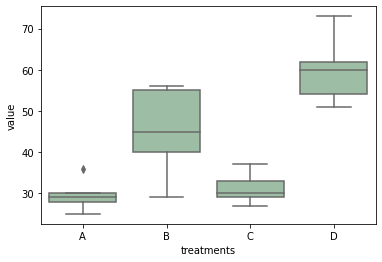

In [5]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
#sns.set(rc={'figure.figsize':(10, 5)})  # можно менять ширину и высоту при желании


ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
#ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [6]:
import scipy.stats as stats
# Функция f_oneway принимает группы в качестве входных данных и возвращает значения F и P
fvalue, pvalue = stats.f_oneway(df['A'],  df['B'], df['C'], df['D'])

print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

17.492810457516338 2.639241146210922e-05


In [7]:
fvalue, pvalue = stats.f_oneway(df['A'], df['C'])
fvalue, pvalue

(0.40634920634920635, 0.5416380250488471)

### Начнем с датасета про морских гребешков

In [9]:
abalone = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/abalone.csv'
data = pd.read_csv(abalone, error_bad_lines=False)
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [10]:
half = len(data['Length']) // 2 

sam1 = data.loc[half:, 'Length'] # Берем первую половину данных
sam2 = data.loc[:half, 'Length'] # Берем вторую половину данных

stats.ttest_ind(sam2, sam1) # применяем тест Стьюдента. 

Ttest_indResult(statistic=-1.5812897200356624, pvalue=0.11388753958977987)

In [12]:
df['A']

0    25
1    30
2    28
3    36
4    29
Name: A, dtype: int64

# Дисперсионный анализ и датасет про раковины

<div class="alert alert-info">
Вот некоторые данные об измерении раковины (длина рубца передней приводящей мышцы, стандартизированная путем деления на длину) у мидии Mytilus trossulus из пяти мест: 
Тилламук, Орегон; Ньюпорт, Орегон; Петербург, Аляска; Магадан, Россия и Tvarminne, Финляндия.
</div>

In [11]:
from scipy.stats import f_oneway # импортирем функцию для дисперсионного анализа из библиотеки scipy пакета stats

# Берем несколько выборок с размерами раковин разных видов
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835,0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

F, p = f_oneway(tillamook, newport, petersburg, magadan, tvarminne)  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

7.121019471642447 0.0002812242314534544
Разное распределение (отклоняем H0)


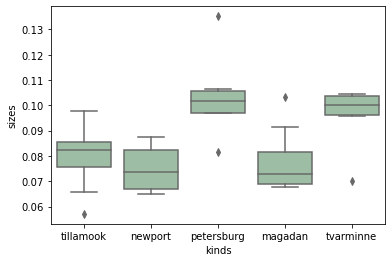

In [12]:
import seaborn as sns  # Еще дна библиотека для визуализации данных, но более продвинутая
 
#Немного преобразуем данные, не важно как
sizes = tillamook + newport +petersburg + magadan + tvarminne
kinds = ['tillamook']*len(tillamook) + ['newport']*len(newport)+['petersburg']*len(petersburg)+['magadan']*len(magadan) + ['tvarminne']*len(tvarminne)
df_mid = pd.DataFrame()
df_mid['sizes'] = sizes
df_mid['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df_mid, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

**Можете привести пример когда выборки зависимы, а когда нет ?**

# Критерием Манна-Уитни

In [13]:
# Тест Вилкоксона для независимых выборок также называется критерием Манна-Уитни

from scipy.stats import mannwhitneyu # Импортируем нужный тест из пакета scipy
 
# Генерируем две независимых выборки
group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]*5  # Некий общий элемент
group_1 = group*5
group_2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]*5

# Сравнение групп
stat, p = mannwhitneyu(group_1, group_2) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))


# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=6250.000, p=0.000
Разные распределения (отвергаем H0)


21.0 22.75


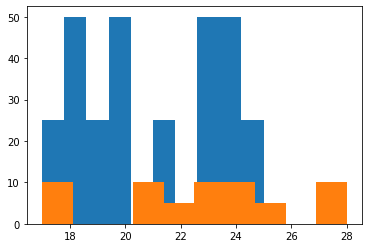

In [19]:
print(np.mean(group_1), np.mean(group_2))

plt.hist(group_1)
plt.hist(group_2);

2021-05-15 19:52:21,083 [9408] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)



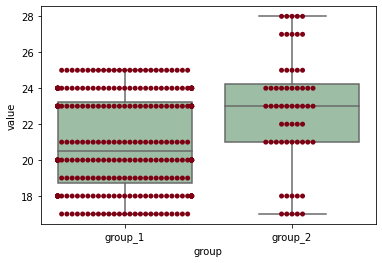

In [15]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()



**Какие выборки зависимы? Приведите пример**

# Критерий Уилкоксона  

In [17]:
from scipy.stats import wilcoxon  # Wilcoxon signed-rank test
 

group =  [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]  # Некий общий элемент
group_1 = group + group 

group_2 = group + [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

group_3 = group + [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 18] # отличие только в одном элементе

import scipy.stats as stats

#Выполняем the Wilcoxon-Signed Rank Test
 

#stat, p = wilcoxon(group_1, group_2)
stat, p = wilcoxon(group_1, group_3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

2021-05-15 19:53:52,725 [9408] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\scipy\stats\morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "

2021-05-15 19:53:52,727 [9408] WARNING  py.warnings:109: [JupyterRequire] C:\Users\sasha\anaconda3\lib\site-packages\scipy\stats\morestats.py:2971: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")



Statistics=0.000, p=0.317
Одинаковые распределения (не отвергаем H0)


(array([5., 1., 2., 3., 1., 4., 4., 2., 0., 2.]),
 array([17. , 18.1, 19.2, 20.3, 21.4, 22.5, 23.6, 24.7, 25.8, 26.9, 28. ]),
 <BarContainer object of 10 artists>)

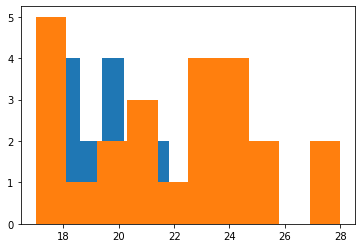

In [18]:
plt.hist(group_1)
plt.hist(group_2)

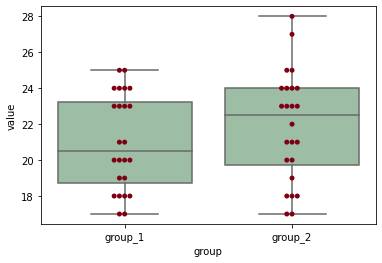

In [28]:
data_group = pd.DataFrame()
data_group['value'] = group_1 + group_2 
data_group['group'] = ['group_1']*len(group_1)+['group_2']*len(group_2)

ax = sns.boxplot(x='group', y='value', data=data_group, color='#99c2a2')
ax = sns.swarmplot(x="group", y="value", data=data_group, color='#7d0013')
plt.show()
# pd.DataFrame(group_2).hist()


# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [19]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [9]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [10]:
#Ваши выводы

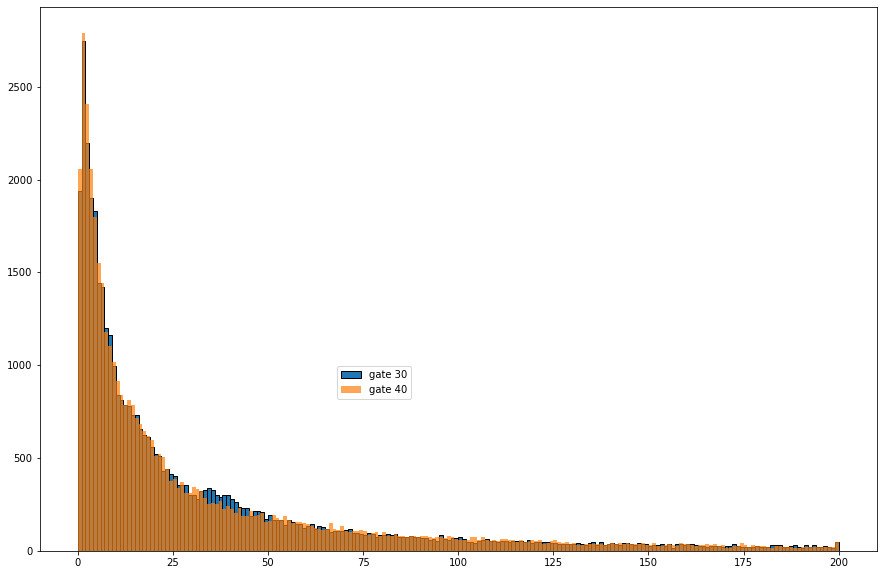

In [11]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

**Ваши выводы**

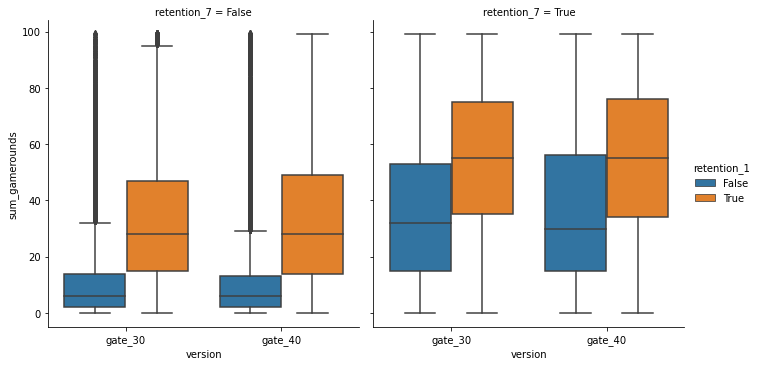

In [12]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


<AxesSubplot:ylabel='Density'>

<Figure size 1080x720 with 0 Axes>

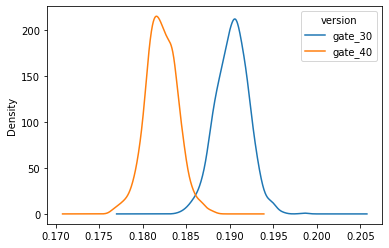

In [13]:
# #Если вдруг оказалось сложно, то вот еще ододин способ визуализации различий
# # Creating an list with bootstrapped means for each AB-group
# plt.figure(figsize=(15, 10))

# boot_1d = []
# for i in range(1000):
#     boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()  #retention_1
#     boot_1d.append(boot_mean)
    
# # Преобразование списка в DataFrame
# boot_1d = pd.DataFrame(boot_1d)
    
# # A Kernel Density Estimate plot of the bootstrap distributions
# boot_1d.plot(kind='density')

In [14]:

from scipy.stats import f_oneway 
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код. 
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [26]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Ваш код. 
 

**Ваши выводы?** 

# !!!Домашняя работа!!!

# Импорты

In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np

# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)
alpha = 0.05

- Н0 - различий нет, эффект случайный;
- Н1 - различия есть, препараты отличаются.

Очевидно по ячейке с присовением переменных, что выборки зависимы. Применяем критерий Уилкоксона.

In [3]:
stat, p = st.wilcoxon(A, B)
print('Wilcoxon criterion:', stat)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

Wilcoxon criterion: 1930.0
p-value: 0.04077572901549266
Отвергаем гипотезу Н0, принимаем гипотезу Н1


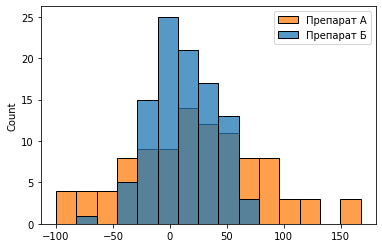

In [4]:
sns.histplot([A, B])
plt.legend(['Препарат А', 'Препарат Б'])

Вывод идентичен. Разница существенная, так что различия обоснованы.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

Изначально выборка А была подмножеством выборки В, но это не подходило по описанию задания, потому что получалось, что группа получающая препарат одновременно его не получает.

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = stats.norm.rvs(scale=54, loc=11, size=100)
alpha = 0.05

- Н0 - эффект случаный, препарат бесполезен
- Н1 - препарат работает

Проверим t-критерием Стьюдента.

In [6]:
t, p = st.ttest_ind(A, B)
print('t-criterion:', t)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

t-criterion: 0.022710084131950473
p-value: 0.9819044021112147
Не отвергаем гипотезу Н0


Не хватает данных для принятия решения. По данному критерию гипотезу Н0 отвергнуть нельзя - против неё недостаточно аргументов. Требуется проверить другими критериями или методами или же использовать дополнительные данные.

Однако всё же на данном этапе выходит так, что люди, принимающие препарат, лечатся с той же эффективностью, что и люди его не принимающие.

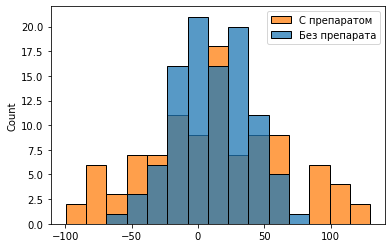

In [7]:
sns.histplot([A, B])
plt.legend(['С препаратом', 'Без препарата'])

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
alpha = 0.05

- Н0 - эффект случаный
- Н1 - удобрение работает

In [9]:
d, p = st.f_oneway(water, nutri, mineral)
print('dispersion:', d)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

dispersion: 12.525963044834192
p-value: 2.9240047906326866e-05
Отвергаем гипотезу Н0, принимаем гипотезу Н1


Вывод: удобрение работает.

{'whiskers': [<matplotlib.lines.Line2D at 0x1747716fe20>,
 'caps': [<matplotlib.lines.Line2D at 0x1747717c520>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1747716fac0>,
 'medians': [<matplotlib.lines.Line2D at 0x1747717cbe0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1747717cf40>,
 'means': []}

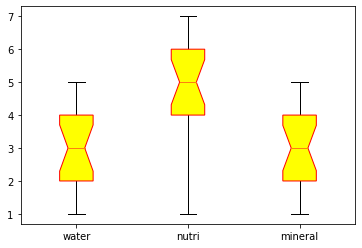

In [10]:
# Боксплот
plt.boxplot(x=[water, nutri, mineral], labels=['water', 'nutri', 'mineral'], 
            notch=True, patch_artist=True, boxprops=dict(facecolor='yellow', color='red'))

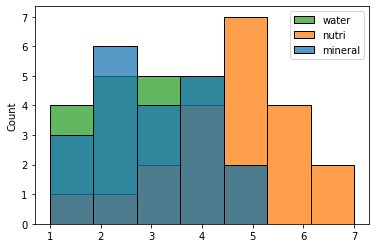

In [11]:
# Гистограмма
sns.histplot([water, nutri, mineral])
plt.legend(['water', 'nutri', 'mineral'])

Вывод идентичен - удобрение работает.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [12]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [13]:
pokemon[pokemon.Name == 'Pikachu']

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
30,31,Pikachu,Electric,NaN,35,55,40,50,50,90,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [14]:
grass_pok = pokemon[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] != 'Rock')) |
                ((pokemon['Class 1'] != 'Rock') & (pokemon['Class 2'] == 'Grass'))]
grass_pok.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
48,49,Oddish,Grass,Poison,45,50,55,75,65,30,False


In [15]:
rock_pok = pokemon[((pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] != 'Grass')) |
                ((pokemon['Class 1'] != 'Grass') & (pokemon['Class 2'] == 'Rock'))]
rock_pok.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
80,81,Geodude,Rock,Ground,40,80,100,30,30,20,False
81,82,Graveler,Rock,Ground,55,95,115,45,45,35,False
82,83,Golem,Rock,Ground,80,120,130,55,65,45,False
103,104,Onix,Rock,Ground,35,45,160,30,45,70,False
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,False


In [16]:
grass_pok_mean = grass_pok['Attack'].mean()
print(grass_pok_mean)
rock_pok_mean = rock_pok['Attack'].mean()
print(rock_pok_mean)

73.73118279569893
91.78571428571429


Как минимум по среднему арифметическому видим, что покемоны класса 'rock' сильнее. Проверим статистически, что разница значимая.

- Н0 - различия случайны
- Н1 - различия значимы

Проверим гипотезы тестом Стьюдента для несвязанных выборок. Примем уровень значимости 5%.

In [17]:
t, p = st.ttest_ind(grass_pok['Attack'], rock_pok['Attack'])
alpha = 0.05
print('t-criterion:', t)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

t-criterion: -3.729457582692065
p-value: 0.00027333381459902653
Отвергаем гипотезу Н0, принимаем гипотезу Н1


{'whiskers': [<matplotlib.lines.Line2D at 0x174772f4bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x174773032b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x174770cfa90>,
 'medians': [<matplotlib.lines.Line2D at 0x174773039a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x17477303d00>,
 'means': []}

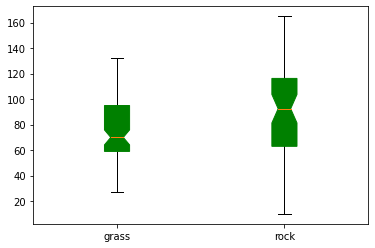

In [18]:
plt.boxplot(x=[grass_pok['Attack'], rock_pok['Attack']], labels=['grass', 'rock'], 
            notch=True, patch_artist=True, boxprops=dict(facecolor='green', color='green'))

Очевидно, разница есть, но она не в пользу покемонов класса 'grass' - они слабее. Это также наглядно видно по отрицательному значению критерия Стьюдента, что говорит о том, что среднее значение атаки травяных покемонов меньше, чем у горных.

Вывод: гипотеза профессора ошибочна.

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [19]:
water_pok = pokemon[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] != 'Normal')) |
                ((pokemon['Class 1'] != 'Normal') & (pokemon['Class 2'] == 'Water'))]
water_pok.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,False
12,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,False
59,60,Psyduck,Water,NaN,50,52,48,65,50,55,False


In [20]:
normal_pok = pokemon[((pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] != 'Water')) |
                ((pokemon['Class 1'] != 'Water') & pokemon['Class 2'] == 'Normal')]
normal_pok.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
20,21,Pidgey,Normal,Flying,40,45,40,35,35,56,False
21,22,Pidgeotto,Normal,Flying,63,60,55,50,50,71,False
22,23,Pidgeot,Normal,Flying,83,80,75,70,70,101,False
23,24,Mega Pidgeot,Normal,Flying,83,80,80,135,80,121,False
24,25,Rattata,Normal,NaN,30,56,35,25,35,72,False


In [21]:
print(water_pok['Speed'].mean())
print(normal_pok['Speed'].mean())

64.936
71.55670103092784


Среднее значение вновь показывает, что гипотеза профессора неверна. Проверим это статистически.
- Н0 - различия случайны
- Н1 - различия значимы

Проверим гипотезы тестом Стьюдента для несвязанных выборок. Примем уровень значимости 5%.

In [22]:
t, p = st.ttest_ind(water_pok['Speed'], normal_pok['Speed'])
alpha = 0.05
print('t-criterion:', t)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

t-criterion: -1.92292146435171
p-value: 0.05578101188665443
Не отвергаем гипотезу Н0


{'whiskers': [<matplotlib.lines.Line2D at 0x1747736bd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1747737a2b0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1747736b9a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1747737a970>,
 'fliers': [<matplotlib.lines.Line2D at 0x1747737acd0>,
 'means': []}

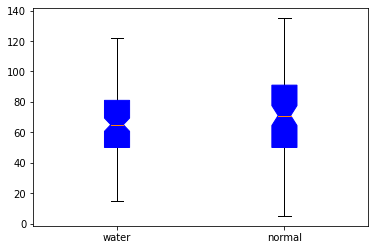

In [23]:
plt.boxplot(x=[water_pok['Speed'], normal_pok['Speed']], labels=['water', 'normal'], 
            notch=True, patch_artist=True, boxprops=dict(facecolor='blue', color='blue'))

Критерий Стьюдента говорит о том, что превосходством в скорости обладают покемоны класса 'normal'. Однако p-value даёт понять, что разница недостаточно, чтобы утверждать, что различия значимы. В любом случае гипотеза профессора неверна.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [24]:
# Покемоны, которые принимали сыворотку увеличения скорости
treated_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

Создадим 2 датафрейма: один - с покемонами не принимавшими сыворотку, второй - с покемонами из списка.

In [25]:
treated_pok_df = pd.DataFrame()
for pok in treated_pokemon:
    treated_pok_df = pd.concat([treated_pok_df, pokemon[pokemon.Name == pok]], axis=0)
treated_pok_df

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [26]:
other_pok = pokemon.loc[lambda pokemon: ~pokemon.Name.isin(treated_pokemon)]
other_pok

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


- Н0 - эффект случайный
- Н1 - сыворотка работает

Используем критерий Стьюдента.

In [27]:
t, p = st.ttest_ind(treated_pok_df.Speed, other_pok.Speed)
alpha = 0.05
print('t-criterion:', t)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

t-criterion: 5.385407401082377
p-value: 9.51510117630786e-08
Отвергаем гипотезу Н0, принимаем гипотезу Н1


Действительно, сыворотка работает. Согласно критерию Стьюдента различия имеют место быть в пользу группы покемонов, принимавших сыворотку.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

Закинем в датафрейм с покемонами 2 новых столбца с суммой указанных параметров и их произведением.

In [28]:
def pok_sum(row):
    result = row['HP'] + row['Attack'] + row['Defense']
    return result
    
    
def pok_mult(row):
    result = row['HP'] * row['Attack'] * row['Defense']
    return result
    
    
pokemon['charac_sum'] = pokemon.apply(pok_sum, axis=1)
pokemon['charac_mult'] = pokemon.apply(pok_mult, axis=1)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,charac_sum,charac_mult
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


In [29]:
# Создадим 2 датафрейма для легендарных покемонов и для всех остальных.
legendary = pokemon[pokemon.Legendary == True]
display(legendary.head())
non_legendary = pokemon[pokemon.Legendary == False]
display(non_legendary.head())

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,charac_sum,charac_mult
156,157,Articuno,Ice,Flying,90,85,100,95,125,85,True,275,765000
157,158,Zapdos,Electric,Flying,90,90,85,125,90,100,True,265,688500
158,159,Moltres,Fire,Flying,90,100,90,125,85,90,True,280,810000
162,163,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True,306,1049400
163,164,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True,396,2014000


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,charac_sum,charac_mult
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204


Зададимся гипотезами:
- Н0 - различия случайны
- Н0 - легендарные покемоны действительно сильнее

Выполним анализ для суммы параметров по критерию Манна-Уитни, поскольку он более устойчив к выбросам:

In [30]:
u, p = st.mannwhitneyu(legendary.charac_sum, non_legendary.charac_sum)
alpha = 0.05
print('u-criterion:', u)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

u-criterion: 5576.0
p-value: 5.635221584292926e-25
Отвергаем гипотезу Н0, принимаем гипотезу Н1


{'whiskers': [<matplotlib.lines.Line2D at 0x174773f7d90>,
 'caps': [<matplotlib.lines.Line2D at 0x17477407460>,
 'boxes': [<matplotlib.patches.PathPatch at 0x174773f7a60>,
 'medians': [<matplotlib.lines.Line2D at 0x17477407b20>,
 'fliers': [<matplotlib.lines.Line2D at 0x17477407e80>,
 'means': []}

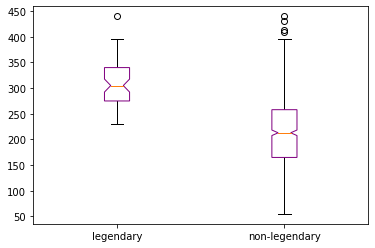

In [31]:
# Боксплот для сложения
plt.boxplot(x=[legendary.charac_sum, non_legendary.charac_sum], labels=['legendary', 'non-legendary'], 
            notch=True, patch_artist=True, boxprops=dict(facecolor='white', color='purple'))

Вывод: по сумме указанных характеристик легендарные покемоны действительно сильнее.

Теперь тот же анализ, но для произведения характеристик.

In [32]:
u, p = st.mannwhitneyu(legendary.charac_mult, non_legendary.charac_mult)
alpha = 0.05
print('u-criterion:', u)
print('p-value:', p)
if p < alpha:
    print('Отвергаем гипотезу Н0, принимаем гипотезу Н1')
else:
    print('Не отвергаем гипотезу Н0')

u-criterion: 5741.5
p-value: 1.4775262883780305e-24
Отвергаем гипотезу Н0, принимаем гипотезу Н1


{'whiskers': [<matplotlib.lines.Line2D at 0x17477466f70>,
 'caps': [<matplotlib.lines.Line2D at 0x17477474670>,
 'boxes': [<matplotlib.patches.PathPatch at 0x17477466be0>,
 'medians': [<matplotlib.lines.Line2D at 0x17477474d30>,
 'fliers': [<matplotlib.lines.Line2D at 0x174774810d0>,
 'means': []}

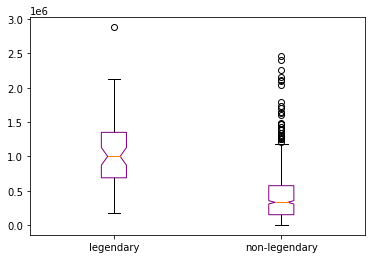

In [33]:
# Боксплот для умножения
plt.boxplot(x=[legendary.charac_mult, non_legendary.charac_mult], labels=['legendary', 'non-legendary'], 
            notch=True, patch_artist=True, boxprops=dict(facecolor='white', color='purple'))

В целом по результатам p-value видно, что легендарные покемоны сильнее. Однако, опираясь на боксплоты и количество выбросов на них, можно заметить, что и среди нелегендарных покемонов есть очень сильные представители, которые могут дать фору своим легендарным собратьям.

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [34]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [35]:
# Выделим из датафрейма 4 класса покемонов.
# В этот раз в случае, если покемон относится к двум классам одновременно из списка,
# мы его оставим.
rock_def = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]
ground_def = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')]
steel_def = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')]
ice_def = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')]

In [36]:
# Теперь просто посмотрим разницу дисперсионным анализом.
F, p = st.f_oneway(rock_def['Defense'], ground_def['Defense'], steel_def['Defense'], ice_def['Defense'])
alpha = 0.05

print(F, p)
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

10.82012408304731 1.231528168152447e-06
Разное распределение (отклоняем H0)


{'whiskers': [<matplotlib.lines.Line2D at 0x174774d8f40>,
 'caps': [<matplotlib.lines.Line2D at 0x174774e65e0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x174774d8be0>,
 'medians': [<matplotlib.lines.Line2D at 0x174774e6ca0>,
 'fliers': [<matplotlib.lines.Line2D at 0x174774f2040>,
 'means': []}

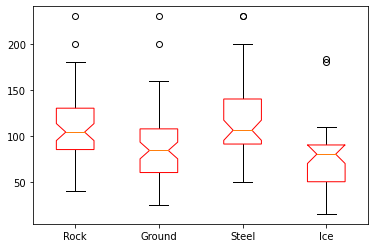

In [37]:
plt.boxplot(x=[rock_def['Defense'], ground_def['Defense'], steel_def['Defense'], ice_def['Defense']],
            labels=['Rock', 'Ground', 'Steel', 'Ice'], notch=True, patch_artist=True, 
            boxprops=dict(facecolor='white', color='red'))

Вывод: дисперсионный анализ показывает, что у этих групп разное распределение параметра Defense. Так что гипотеза о том, что эти классы покемонов не отличаются по уровню защиты отклоняется: Steel - самые защищенные, Ice - наименее защищены.